### Bayes from sklearn 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd 
import numpy as np 
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import random


import Data_preparation as  DP
DP=DP.Data_preparation()


### Import the Dataset 


In [3]:

df=DP.load_csv_to_df("ricsData_big_v5.csv")
print(df.columns)

Index(['Rel_BreitGross', 'RelSpitze_oben', 'RelSpitze_unten', 'Anzahl_Linie',
       'Anzahl_Ecken', 'Anzahl_Kreis', 'innere_Konturen', 'Label'],
      dtype='object')


In [4]:
# Select features that are suitable for classification according to the Scatterplot from the Visualize_Dataset.ipynb
df=df[["Rel_BreitGross","RelSpitze_oben","RelSpitze_unten","Anzahl_Linie","Label"]]
X_train,X_test,y_train,y_test=DP.split_data(df,0.7)
df.head()

training set size: 564 samples 
test set size: 241 samples


,Rel_BreitGross,RelSpitze_oben,RelSpitze_unten,Anzahl_Linie,Label
0,0.288606,0.074919,0.618893,6,0
1,0.494050,0.685185,0.634259,5,0
2,0.497540,0.986384,0.989410,15,0
3,0.480687,0.714286,0.592262,21,0
4,0.322937,0.159763,0.633136,21,0


### create a Bayes classifier

In [5]:

gnb = GaussianNB()  #
y_pred = gnb.fit(X_train.values,y_train.values.ravel()).predict(X_test.values) # fit the bases model with the trainings and test data 



### Print the Metrics 

              precision    recall  f1-score   support

           0       0.46      0.31      0.37        71
           1       0.50      0.79      0.61        84
           2       0.65      0.47      0.54        86

    accuracy                           0.53       241
   macro avg       0.54      0.52      0.51       241
weighted avg       0.54      0.53      0.52       241

Confusion matrix
[[22 39 10]
 [ 6 66 12]
 [20 26 40]]


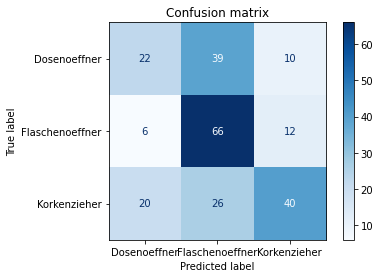

In [6]:
print(metrics.classification_report(y_test,y_pred))
np.set_printoptions(precision=2) # only to digits after the dot 
class_names=["Dosenoeffner","Flaschenoeffner","Korkenzieher"]# name the classes 

### create a confusion Matrix 
disp = ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test.values,
    y_test.values,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")

print("Confusion matrix")
print(disp.confusion_matrix)

### Predict an single Image 

In [7]:
random_index=random.randint(0,len(X_test)) # draw an random index out of the test_data 
prediction=gnb.predict(X_test.values[random_index].reshape(1,-1))#make a prediction 
print("Class predictet by KNN: {}".format(prediction))
print("actual Class: {} ".format(y_test.iloc[random_index,:]))

Class predictet by KNN: [2]
actual Class: Label    0
Name: 40, dtype: int64 
